In [76]:
import numpy as np
import pandas as pd

In [77]:
data = pd.read_csv('Global_Education.csv', encoding='ISO-8859-1')

In [78]:
data.columns

Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [79]:
data['Countries and areas']
dfd = data.sort_values('Unemployment_Rate', ascending=False)
dfd.head(3)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
166,South Africa,30.559482,22.937506,28,27,12,10,16,13,22,...,0,13,0,0,0,0,20.510000,100.900000,22.400000,28.180000
99,Lesotho,29.609988,28.233608,58,57,3,2,21,13,38,...,0,0,0,0,0,0,26.810000,120.900000,10.200000,23.410000
151,Saint Lucia,13.909444,60.978893,5,0,3,0,9,10,20,...,0,0,0,0,0,0,12.000000,102.600000,14.100000,20.710000


In [80]:
dfd = data
dfd['OOSR_Primary'] = (dfd['OOSR_Primary_Age_Male']+dfd['OOSR_Primary_Age_Female'])/2

dfd = data[['Countries and areas','OOSR_Primary']].sort_values('OOSR_Primary', ascending=False)
OOSR_Primary = dfd.set_axis(range(1, len(dfd)+1)).head(10)
OOSR_Primary

,Countries and areas,OOSR_Primary
1,South Sudan,62.500000
2,Equatorial Guinea,55.500000
3,Eritrea,47.500000
4,Niger,41.000000
5,Mali,41.000000
6,Djibouti,33.500000
7,Sudan,33.000000
8,Syria,27.500000
9,Marshall Islands,26.000000
10,Chad,26.000000


In [81]:
dfd = data
dfd = data[['Countries and areas','OOSR_Primary_Age_Female']].sort_values('OOSR_Primary_Age_Female', ascending=False)
OOSR_Primary_Age_Female = dfd.set_axis(range(1, len(dfd)+1)).head(10)
OOSR_Primary_Age_Female

,Countries and areas,OOSR_Primary_Age_Female
1,South Sudan,67
2,Equatorial Guinea,55
3,Eritrea,50
4,Niger,45
5,Mali,44
6,Djibouti,35
7,Chad,35
8,Sudan,35
9,Guinea,29
10,Syria,28


In [82]:
dfd = data
dfd = data[['Countries and areas','OOSR_Primary_Age_Male']].sort_values('OOSR_Primary_Age_Male', ascending=False)
OOSR_Primary_Age_Male = dfd.set_axis(range(1, len(dfd)+1)).head(10)
OOSR_Primary_Age_Male

,Countries and areas,OOSR_Primary_Age_Male
1,South Sudan,58
2,Equatorial Guinea,56
3,Eritrea,45
4,Mali,38
5,Niger,37
6,Djibouti,32
7,Sudan,31
8,Senegal,30
9,Syria,27
10,Marshall Islands,25


C:\Users\Ma\AppData\Local\Temp\ipykernel_34776\2133643832.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


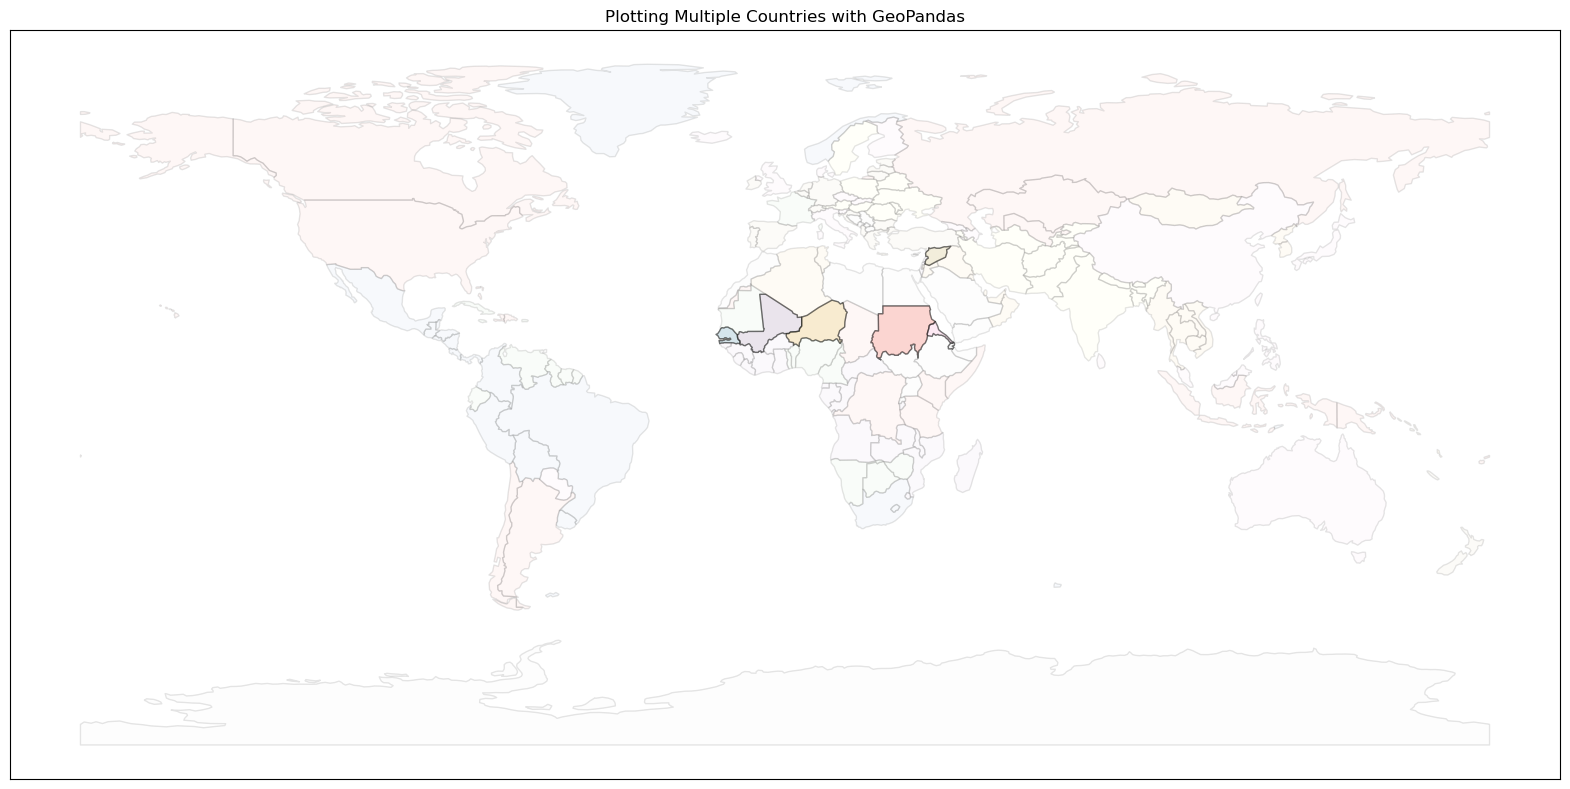

In [83]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# define the names of the countries we want to plot
country_names = data.sort_values(by=['OOSR_Primary_Age_Male'], ascending=False).head(10)
country_names = country_names['Countries and areas']

africa = world[world["continent"] == "Africa"]

# grab multiple countries from the continent of Africa
countries = world[world["name"].isin(country_names)]

# plot a map of the countries
countries.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)
world.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.1
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Plotting Multiple Countries with GeoPandas")
plt.show()

In [84]:
syr_female = OOSR_Primary_Age_Female[OOSR_Primary_Age_Female['Countries and areas']=='Syria']
syr_male = OOSR_Primary_Age_Male[OOSR_Primary_Age_Male['Countries and areas']=='Syria']

OOSR_Primary_Age_Syria = OOSR_Primary_Age_Female[OOSR_Primary_Age_Female['Countries and areas']=='Syria']
OOSR_Primary_Age_Syria['OOSR_Primary_Age_Male'] = syr_male.iloc[0,1]
OOSR_Primary_Age_Syria

C:\Users\Ma\AppData\Local\Temp\ipykernel_34776\3730881252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OOSR_Primary_Age_Syria['OOSR_Primary_Age_Male'] = syr_male.iloc[0,1]


,Countries and areas,OOSR_Primary_Age_Female,OOSR_Primary_Age_Male
10,Syria,28,27


In [85]:
gov_exp = pd.read_csv('total-government-expenditure-on-education-gdp.csv', encoding='ISO-8859-1')

In [86]:
mean_gov_exp = gov_exp.groupby(['Entity']).mean().sort_values('Historical and more recent expenditure estimates', ascending=True)
mean_gov_exp['country'] = mean_gov_exp.index

C:\Users\Ma\AppData\Local\Temp\ipykernel_34776\1056866685.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_gov_exp = gov_exp.groupby(['Entity']).mean().sort_values('Historical and more recent expenditure estimates', ascending=True)


In [87]:
least_mean_gov_exp = mean_gov_exp[0:1]

for i in list(OOSR_Primary['Countries and areas']):
    if i in list(mean_gov_exp['country'].unique()):
        least_mean_gov_exp = pd.concat([least_mean_gov_exp,mean_gov_exp[mean_gov_exp['country']==i]])

least_mean_gov_exp = least_mean_gov_exp.tail(10)
least_mean_gov_exp['country'] = least_mean_gov_exp.index
least_mean_gov_exp = least_mean_gov_exp.reset_index()
least_mean_gov_exp.rename(columns={'Entity': 'Country', 'Historical and more recent expenditure estimates': 'Mean Government Expenditure on education by GDP'}, inplace=True)
least_mean_gov_exp.drop(['Year','country'],axis=1)
least_mean_gov_exp = least_mean_gov_exp.set_axis(range(1, len(least_mean_gov_exp)+1)).head(10)
least_mean_gov_exp.drop(['Year','country'],axis=1)

,Country,Mean Government Expenditure on education by GDP
1,South Sudan,1.249388
2,Equatorial Guinea,2.187980
3,Eritrea,3.481281
4,Niger,2.879837
5,Mali,3.418666
6,Djibouti,6.566320
7,Sudan,1.442083
8,Syria,4.974698
9,Marshall Islands,12.197589
10,Chad,2.353525


In [88]:
GDP = pd.read_csv('national-gdp-constant-usd-wb.csv', encoding='ISO-8859-1')

In [89]:
GDP['GDP (constant 2015 US$)']= GDP['GDP (constant 2015 US$)']
mean_gdp = GDP.groupby(['Entity']).mean()
mean_gdp['country'] = mean_gdp.index

C:\Users\Ma\AppData\Local\Temp\ipykernel_34776\2690500873.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_gdp = GDP.groupby(['Entity']).mean()


In [90]:
least_mean_gdp = mean_gdp[0:1]

for i in list(OOSR_Primary['Countries and areas']):
    if i in list(mean_gdp['country'].unique()):
        least_mean_gdp = pd.concat([least_mean_gdp,mean_gdp[mean_gdp['country']==i]])

least_mean_gdp= least_mean_gdp.tail(10)
least_mean_gdp['country'] = least_mean_gdp.index
least_mean_gdp = least_mean_gdp.reset_index()
least_mean_gdp.rename(columns={'Entity': 'Country', 'GDP (constant 2015 US$)': 'Mean GDP'}, inplace=True)
least_mean_gdp.drop(['Year'],axis=1)
least_mean_gdp = least_mean_gdp.set_axis(range(1, len(least_mean_gdp)+1)).head(10)
least_mean_gdp = least_mean_gdp.drop(['Year','country'],axis=1)
least_mean_gdp

,Country,Mean GDP
1,South Sudan,16880470750.000000
2,Equatorial Guinea,5807045273.095238
3,Eritrea,1917224960.000000
4,Niger,5171809617.741936
5,Mali,6679638290.909091
6,Djibouti,2699681411.111111
7,Sudan,47888077919.354836
8,Syria,14213596218.032787
9,Marshall Islands,158503385.463415
10,Chad,4205561456.451613


In [91]:
least_mean_gdp ['Mean Government Expenditure on education by GDP'] = least_mean_gov_exp['Mean Government Expenditure on education by GDP']

In [92]:
least_mean_gdp['Mean Government Expenditure on education by USD'] = least_mean_gdp['Mean GDP']*least_mean_gdp['Mean Government Expenditure on education by GDP']/100

In [96]:
least_mean_gdp
pd.options.display.float_format = '{:f}'.format
least_mean_gdp

,Country,Mean GDP by USD,Public spending on education as a share of GDP,Public spending on education by USD
1,South Sudan,16880470750.000000,1.249388,210902643.415893
2,Equatorial Guinea,5807045273.095238,2.187980,127056989.166269
3,Eritrea,1917224960.000000,3.481281,66743996.476416
4,Niger,5171809617.741936,2.879837,148939665.392084
5,Mali,6679638290.909091,3.418666,228354516.017535
6,Djibouti,2699681411.111111,6.566320,177269713.446660
7,Sudan,47888077919.354836,1.442083,690585762.290230
8,Syria,14213596218.032787,4.974698,707083429.932168
9,Marshall Islands,158503385.463415,12.197589,19333591.686028
10,Chad,4205561456.451613,2.353525,98978950.080930


In [94]:
least_mean_gdp.rename(columns={'Mean GDP': 'Mean GDP by USD', 'Mean Government Expenditure on education by GDP' : 'Public spending on education as a share of GDP', 'Mean Government Expenditure on education by USD' : 'Public spending on education by USD'}, inplace=True)

In [95]:
least_mean_gdp

,Country,Mean GDP by USD,Public spending on education as a share of GDP,Public spending on education by USD
1,South Sudan,16880470750.000000,1.249388,210902643.415893
2,Equatorial Guinea,5807045273.095238,2.187980,127056989.166269
3,Eritrea,1917224960.000000,3.481281,66743996.476416
4,Niger,5171809617.741936,2.879837,148939665.392084
5,Mali,6679638290.909091,3.418666,228354516.017535
6,Djibouti,2699681411.111111,6.566320,177269713.446660
7,Sudan,47888077919.354836,1.442083,690585762.290230
8,Syria,14213596218.032787,4.974698,707083429.932168
9,Marshall Islands,158503385.463415,12.197589,19333591.686028
10,Chad,4205561456.451613,2.353525,98978950.080930
